## Exercise 


For this exercise, you will be working with the [House Price Dataset](https://www.kaggle.com/competitions/house-prices-advanced-regression-techniques/code).

Please grab the train.csv file from Kaggle and explore this dataset. You need to perform explroatory data analysis and see if there is any correlation between the variables and analyze the distribution of the dataset. The question is open-ended and basically you're asked to perform EDA. 


1- Write a summary of your findings in one page (e.g., summary statistics, plots) and submit the pdf file. Therefore, for part 3 of your assignment, you need to submit at least one jupyter notebook file and one pdf file.


2- Push your code and project to github and provide the link to your code here. Ensure that your github project is organized to at least couple of main folders, ensure that you have the README file as well:

- Src
- Data
- Docs
- Results

Read this link for further info:  https://gist.github.com/ericmjl/27e50331f24db3e8f957d1fe7bbbe510





#### Github link:

https://github.com/savelena00/Assignment-3---Housing-Price.git

### Import Functions

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
%matplotlib inline

In [3]:
sns.set()

### Read CSV file

In [42]:
train = pd.read_csv('train.csv')
train

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,142125


In [43]:
train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [5]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

### Identify Missing Data

In [44]:
train.isnull().sum()

Id                 0
MSSubClass         0
MSZoning           0
LotFrontage      259
LotArea            0
                ... 
MoSold             0
YrSold             0
SaleType           0
SaleCondition      0
SalePrice          0
Length: 81, dtype: int64

### Drop columns with missing number above 1000

In [45]:
train = train.dropna(axis=1, how='any', thresh = 1000)
train

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,Reg,Lvl,AllPub,Inside,...,0,0,0,0,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,Reg,Lvl,AllPub,FR2,...,0,0,0,0,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,IR1,Lvl,AllPub,Inside,...,0,0,0,0,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,IR1,Lvl,AllPub,Corner,...,272,0,0,0,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,IR1,Lvl,AllPub,FR2,...,0,0,0,0,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,Reg,Lvl,AllPub,Inside,...,0,0,0,0,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,Reg,Lvl,AllPub,Inside,...,0,0,0,0,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,Reg,Lvl,AllPub,Inside,...,0,0,0,0,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,Reg,Lvl,AllPub,Inside,...,112,0,0,0,0,4,2010,WD,Normal,142125


### Replace Missing Data with Mean

In [47]:
train.fillna(train.mean(), inplace = True)
train

/var/folders/8y/4hrdj75n3qd5xzkj7p6xb64m0000gn/T/ipykernel_16487/998125551.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  train.fillna(train.mean(), inplace = True)
/var/folders/8y/4hrdj75n3qd5xzkj7p6xb64m0000gn/T/ipykernel_16487/998125551.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train.fillna(train.mean(), inplace = True)


,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,Reg,Lvl,AllPub,Inside,...,0,0,0,0,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,Reg,Lvl,AllPub,FR2,...,0,0,0,0,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,IR1,Lvl,AllPub,Inside,...,0,0,0,0,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,IR1,Lvl,AllPub,Corner,...,272,0,0,0,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,IR1,Lvl,AllPub,FR2,...,0,0,0,0,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,Reg,Lvl,AllPub,Inside,...,0,0,0,0,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,Reg,Lvl,AllPub,Inside,...,0,0,0,0,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,Reg,Lvl,AllPub,Inside,...,0,0,0,0,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,Reg,Lvl,AllPub,Inside,...,112,0,0,0,0,4,2010,WD,Normal,142125


In [48]:
train.isnull().sum()

Id               0
MSSubClass       0
MSZoning         0
LotFrontage      0
LotArea          0
                ..
MoSold           0
YrSold           0
SaleType         0
SaleCondition    0
SalePrice        0
Length: 76, dtype: int64

In [50]:
train.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,22.024023,9981.264932,1.382997,1.112799,30.202904,20.645407,180.569112,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,60.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,70.049958,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,79.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,164.250000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


### Findings:
    * 

In [51]:
train.nunique()

Id               1460
MSSubClass         15
MSZoning            5
LotFrontage       111
LotArea          1073
                 ... 
MoSold             12
YrSold              5
SaleType            9
SaleCondition       6
SalePrice         663
Length: 76, dtype: int64

## The variables that is going to be used in this project:
    * Numerical : Fireplaces, Sale Price, Year Built, Full Bath
    * Categorical : MS Zoning, Lot Shape, Sale Type, Neighborhood

### Overall correlation of relevant numerical variable

In [13]:
df = train.loc[:,['Fireplaces','SalePrice','YearBuilt','FullBath']]

In [14]:
df.corr()

,Fireplaces,SalePrice,YearBuilt,FullBath
Fireplaces,1.000000,0.466929,0.147716,0.243671
SalePrice,0.466929,1.000000,0.522897,0.560664
YearBuilt,0.147716,0.522897,1.000000,0.468271
FullBath,0.243671,0.560664,0.468271,1.000000


<AxesSubplot:>

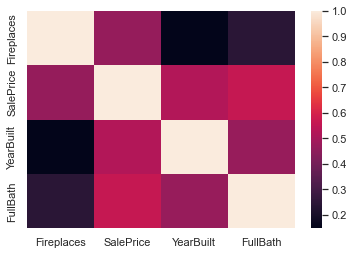

In [21]:
sns.heatmap(df.corr())

## The Assumptions:
    * There is an association between number of Fireplaces and Sale Price, where the larger the area, the higher the Sale Price
    * There is an association between Year Sold and Sale Price, where the larger the year, the higher the Sale Price
    * There is an association between Pool Area and Sale Price, where the larger the pool area, the higher the Sale Price
    * There is an association between MS Zoning and Sale Price, where Residential High Density is expected to have the highest Sale Price
    * There is an association between Overall Quality and Overall condition, where the higher the Overall Quality, the Overall condition is expected to be high as well
    * There is an association between Central Air Conditioning and Sale Price

## Determine the Association between Fireplaces and Sale Price

In [22]:
train[['Fireplaces','SalePrice']].corr()

,Fireplaces,SalePrice
Fireplaces,1.000000,0.466929
SalePrice,0.466929,1.000000


#### there is a positive linear correlation between the two variables

### Average House Sale Price and Number of Fireplaces

In [23]:
Fireplace = train[['Fireplaces','SalePrice']].groupby('Fireplaces').mean()
Fireplace

,SalePrice
Fireplaces,
0,141331.482609
1,211843.909231
2,240588.539130
3,252000.000000


### Findings:
    * The more fireplaces in the house, the higher the average house price
    * Houses with no fireplace have a lower Sale Price

### Distribution of Fireplaces

<AxesSubplot:xlabel='Fireplaces', ylabel='Count'>

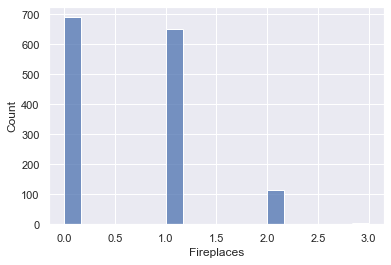

In [24]:
sns.histplot(train['Fireplaces'])

### Association between Fireplaces and Sale Price

<AxesSubplot:xlabel='Fireplaces', ylabel='SalePrice'>

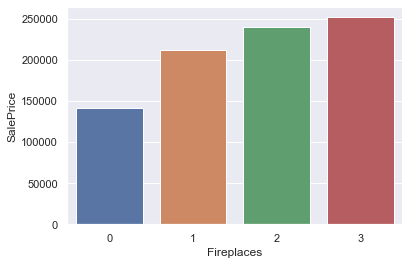

In [26]:
sns.barplot(x = 'Fireplaces', y = 'SalePrice', data = train, ci= None)

<AxesSubplot:xlabel='Fireplaces', ylabel='SalePrice'>

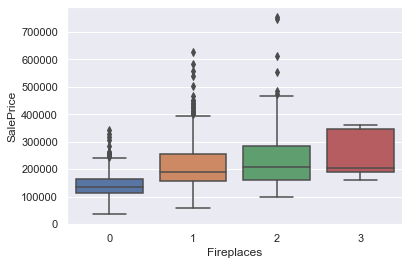

In [27]:
sns.boxplot(x = 'Fireplaces', y = 'SalePrice', data = train)

### Findings:
    * The graph shows that the more fireplaces, the higher the Sale Price
    * The graph displays a positive direction 
    * There are a more outliers in houses with 0,1,and 2 fireplaces, which indicates that some houses in these categories have a higher price than the houses with 3 fireplaces
    * The average sale price of the houses with 3 fireplace is similar or very close to the houses with 2 fireplace
    * The outliers may indicate that there are other factors aside of fireplace that heavily influenced the saleprice of the house

## Determine the Association between FullBath and Sale Price

In [28]:
train[['FullBath','SalePrice']].corr()

,FullBath,SalePrice
FullBath,1.000000,0.560664
SalePrice,0.560664,1.000000


#### there is a positive linear correlation between the two variables

### Distribution of FullBath

<AxesSubplot:xlabel='FullBath', ylabel='Count'>

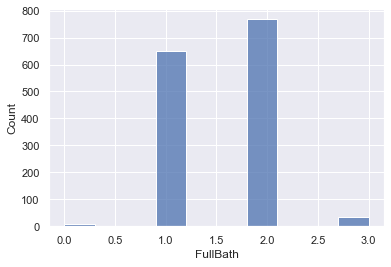

In [29]:
sns.histplot(train['FullBath'], bins = 10)

#### The most houses are sold in the year of 2009, whereas the lowest is in 2010

### Shows the FullBath and the Sale Price

In [30]:
pd.pivot_table(train, index = 'FullBath', values = 'SalePrice')

,SalePrice
FullBath,
0,165200.888889
1,134751.440000
2,213009.825521
3,347822.909091


### Association between Full Bath and Sale Price

<AxesSubplot:xlabel='FullBath', ylabel='SalePrice'>

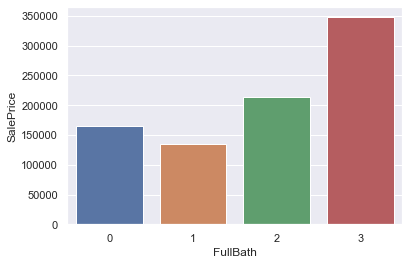

In [32]:
sns.barplot(x = 'FullBath', y = 'SalePrice', data = train, ci= None)

### Findings:
    * The highest Sale Price is for houses with 3 full bathrooms that are above grade  
    * The lowest Sale Price is for houses with 1 full bathroom that are above grade 

## Find the Association between Year Built and Sale Price

In [33]:
train[['YearBuilt','SalePrice']].corr()

,YearBuilt,SalePrice
YearBuilt,1.000000,0.522897
SalePrice,0.522897,1.000000


#### there is a positive linear correlation between the two variables

In [34]:
Sale = train['SalePrice']
Sale

0       208500
1       181500
2       223500
3       140000
4       250000
         ...  
1455    175000
1456    210000
1457    266500
1458    142125
1459    147500
Name: SalePrice, Length: 1460, dtype: int64

In [35]:
pd.pivot_table(train, index = 'YearBuilt', values = 'SalePrice')

,SalePrice
YearBuilt,
1872,122000.000000
1875,94000.000000
1880,200619.750000
1882,168000.000000
1885,111250.000000
...,...
2006,251775.447761
2007,255362.734694
2008,348849.130435


In [29]:
train['YearBuilt'].nunique()

112

### To see the Distribution of Year Built

<AxesSubplot:xlabel='YearBuilt', ylabel='Count'>

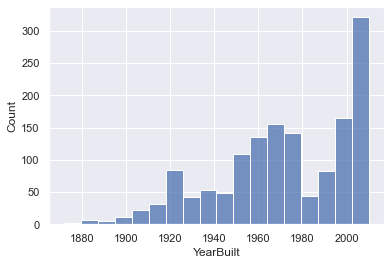

In [36]:
sns.histplot(train['YearBuilt'])

### To see the association between Year Built and Sale Price

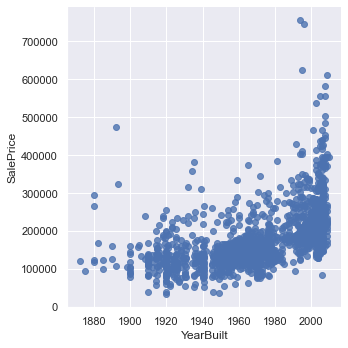

In [37]:
sns.lmplot(x = 'YearBuilt', y = 'SalePrice', data = train, fit_reg = False, palette = "Set1")

In [38]:
from matplotlib.pyplot import figure
figure(num=None, figsize=(60,40), dpi=300, facecolor='w', edgecolor='r')
sns.boxplot (x=train["YearBuilt"], y=train["SalePrice"])

<AxesSubplot:xlabel='YearBuilt', ylabel='SalePrice'>

In [39]:
train['YearBuilt'].describe()

count    1460.000000
mean     1971.267808
std        30.202904
min      1872.000000
25%      1954.000000
50%      1973.000000
75%      2000.000000
max      2010.000000
Name: YearBuilt, dtype: float64

### Findings:
    * The average houses are built in 1971
    * Out of 1460 houses, 25% are built from 2000 
    * The oldest house is built in 1872
    * From the median it is observed that in general the sale price trend tend to increase until 2008 before taking a sharp plunge in 2009. This significant drop may be caused by the property market bubble and the financial market turmoil.
    * From the median it is observed that the average lowest sale price of houses is built in 1927
    * There are larger data disperse for houses built in 1880, 1892, and 2008 which indicates there was a high demand or maybe a volatility in property market during those years 
    

## Association between MS Zoning and Sale Price

### To see the distribution of MSZoning 

<AxesSubplot:xlabel='MSZoning', ylabel='Count'>

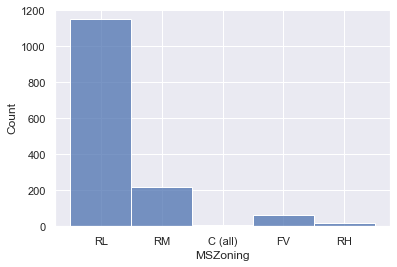

In [52]:
sns.histplot(train['MSZoning'], bins = 5)

In [53]:
train.groupby('MSZoning').count()['SalePrice']

MSZoning
C (all)      10
FV           65
RH           16
RL         1151
RM          218
Name: SalePrice, dtype: int64

In [54]:
train['MSZoning'].describe()

count     1460
unique       5
top         RL
freq      1151
Name: MSZoning, dtype: object

### Findings:
    * It could be seen that most housing classification is in the RL (Residential Low Density) zone
    * The zone with the least number of houses is C (Commercial) with only 10 houses followed by RH (Residential High Density)
    * The distribution of the data does not represent a normal distribution
    * It could be observed that there are no Agriculture, Industrial, and Residential Low Density Park classification
 

### To see the association between MSZoning and Sale Price

In [116]:
pd.pivot_table(train, index = 'MSZoning', values = 'SalePrice')

,SalePrice
MSZoning,
C (all),74528.000000
FV,214014.061538
RH,131558.375000
RL,191004.994787
RM,126316.830275


<AxesSubplot:xlabel='MSZoning', ylabel='SalePrice'>

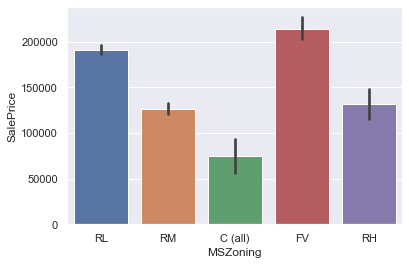

In [121]:
sns.barplot(x = 'MSZoning', y = 'SalePrice', data = train)

<AxesSubplot:xlabel='MSZoning', ylabel='SalePrice'>

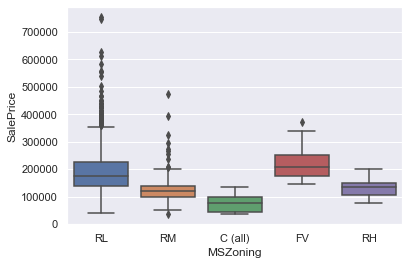

In [152]:
sns.boxplot(x = 'MSZoning', y = 'SalePrice', data = train)

### Findings:
    * Ms Zoning C has the lowest SalePrice compared to other house zonings.
    * From the median, it is observed that FV (Floating Village) has the highest average Sale Price compared to other house zonings.
    * There are outliers in the RL, RM and FV zones
    * The highest Sale Price can be found in the RL zone 
    * From the median it is observed that in average, the lowest sale price is in the Commercial (all) zone.
    * The data disperse is highest at the RL zone which indicates that in this zone, pricing can fluctuate from very low to high
    

## Association Between Lot Shape and Sale Price

### Distribution of Lot Shape

<AxesSubplot:xlabel='LotShape', ylabel='Count'>

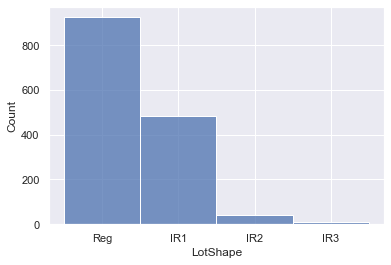

In [22]:
sns.histplot(train['LotShape'])

In [145]:
train['LotShape'].describe()

count     1460
unique       4
top        Reg
freq       925
Name: LotShape, dtype: object

### Findings:
    * The most common Lot Shape is the Regular with the frequency of 925 lots
    * There are 4 kinds of Lot Shape
    * The second, third, and least common Lot shape are IR 1, IR 2 and lastly IR 3

<AxesSubplot:xlabel='LotShape', ylabel='SalePrice'>

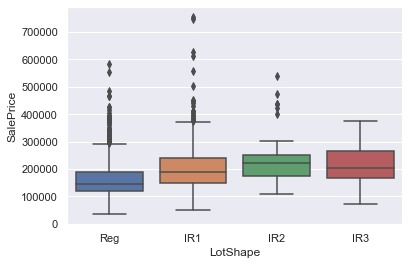

In [113]:
sns.boxplot(x = 'LotShape', y = 'SalePrice', data = train)

### Findings:
    * There are outliers in the Reg, IR1, IR2 Lot Shapes
    * The IR 1 has the most dispersed data, meaning that the Sale Price of the houses with IR 1 lot type varies from under 100000 to above 700000
    * The average sale price of IR2 is the highest as seen from the median
    * Most Regular (Reg) lot shapes are priced from under 100000 to 300000
    * The average Regular (Reg) lot shape has sale price of about 150000
    * The average IR 1 lot shape has sale price of about 180000
    * The average IR 2 lot shape has sale price of about 230000
    * The average IR 3 lot shape has sale price if about 210000

## Association Between Sale Type and Sale Price

### Distribution of Sale Type

<AxesSubplot:xlabel='SaleType', ylabel='Count'>

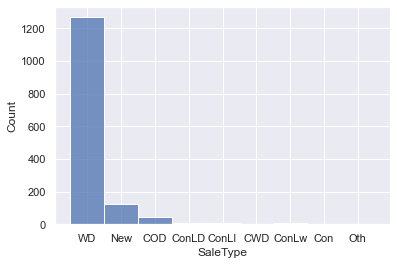

In [57]:
sns.histplot(train['SaleType'])

In [58]:
train['SaleType'].describe()

count     1460
unique       9
top         WD
freq      1267
Name: SaleType, dtype: object

### Findings:
    * Majority of the transactions are done through WD (warranty deed) using conventional means with the frequency of 1267
    * There are 9 different sale types
    * There is slightly more sales done through New (house constructed and sold) means compared to COD (Court Officer/ Deed estate).

<AxesSubplot:xlabel='SaleType', ylabel='SalePrice'>

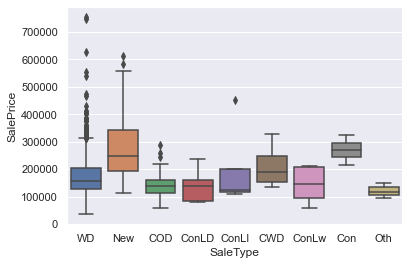

In [59]:
sns.boxplot(x = 'SaleType', y = 'SalePrice', data = train)

<AxesSubplot:xlabel='SaleType', ylabel='SalePrice'>

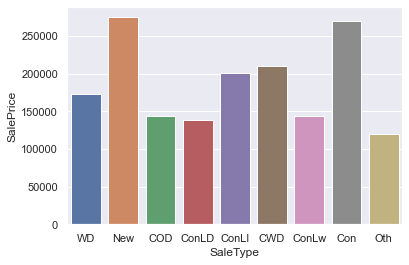

In [165]:
sns.barplot(x = 'SaleType', y = 'SalePrice', data = train, ci= None)

In [60]:
train.groupby('SaleType').mean()['SalePrice'].sort_values()

SaleType
Oth      119850.000000
ConLD    138780.888889
ConLw    143700.000000
COD      143973.255814
WD       173401.836622
ConLI    200390.000000
CWD      210600.000000
Con      269600.000000
New      274945.418033
Name: SalePrice, dtype: float64

### Findings:
    * Waranty Deed (WD) has the most outliers. 
    * Other sale types with outliers are New, COD, and ConLI
    * The New sale type has the highest sale price at 274945.42
    * On average, the New sale type has the largest data dispersion and has the most scattered data which indicates that this sale type is applicable in different ranges of Sale Price
    * The Con sale type has the second largest sale price at 269600
    * For sale price above 200000, most sales are paid using the Con and New sale type as seen from the median
    * For houses with sale price below 100000 there the sale types that are used are WD, COD and ConLw

## Association Between Neighborhood and Sale Price

### Distribution of Neighborhood

Text(0.5, 1.0, 'Distribution of Neighborhood')

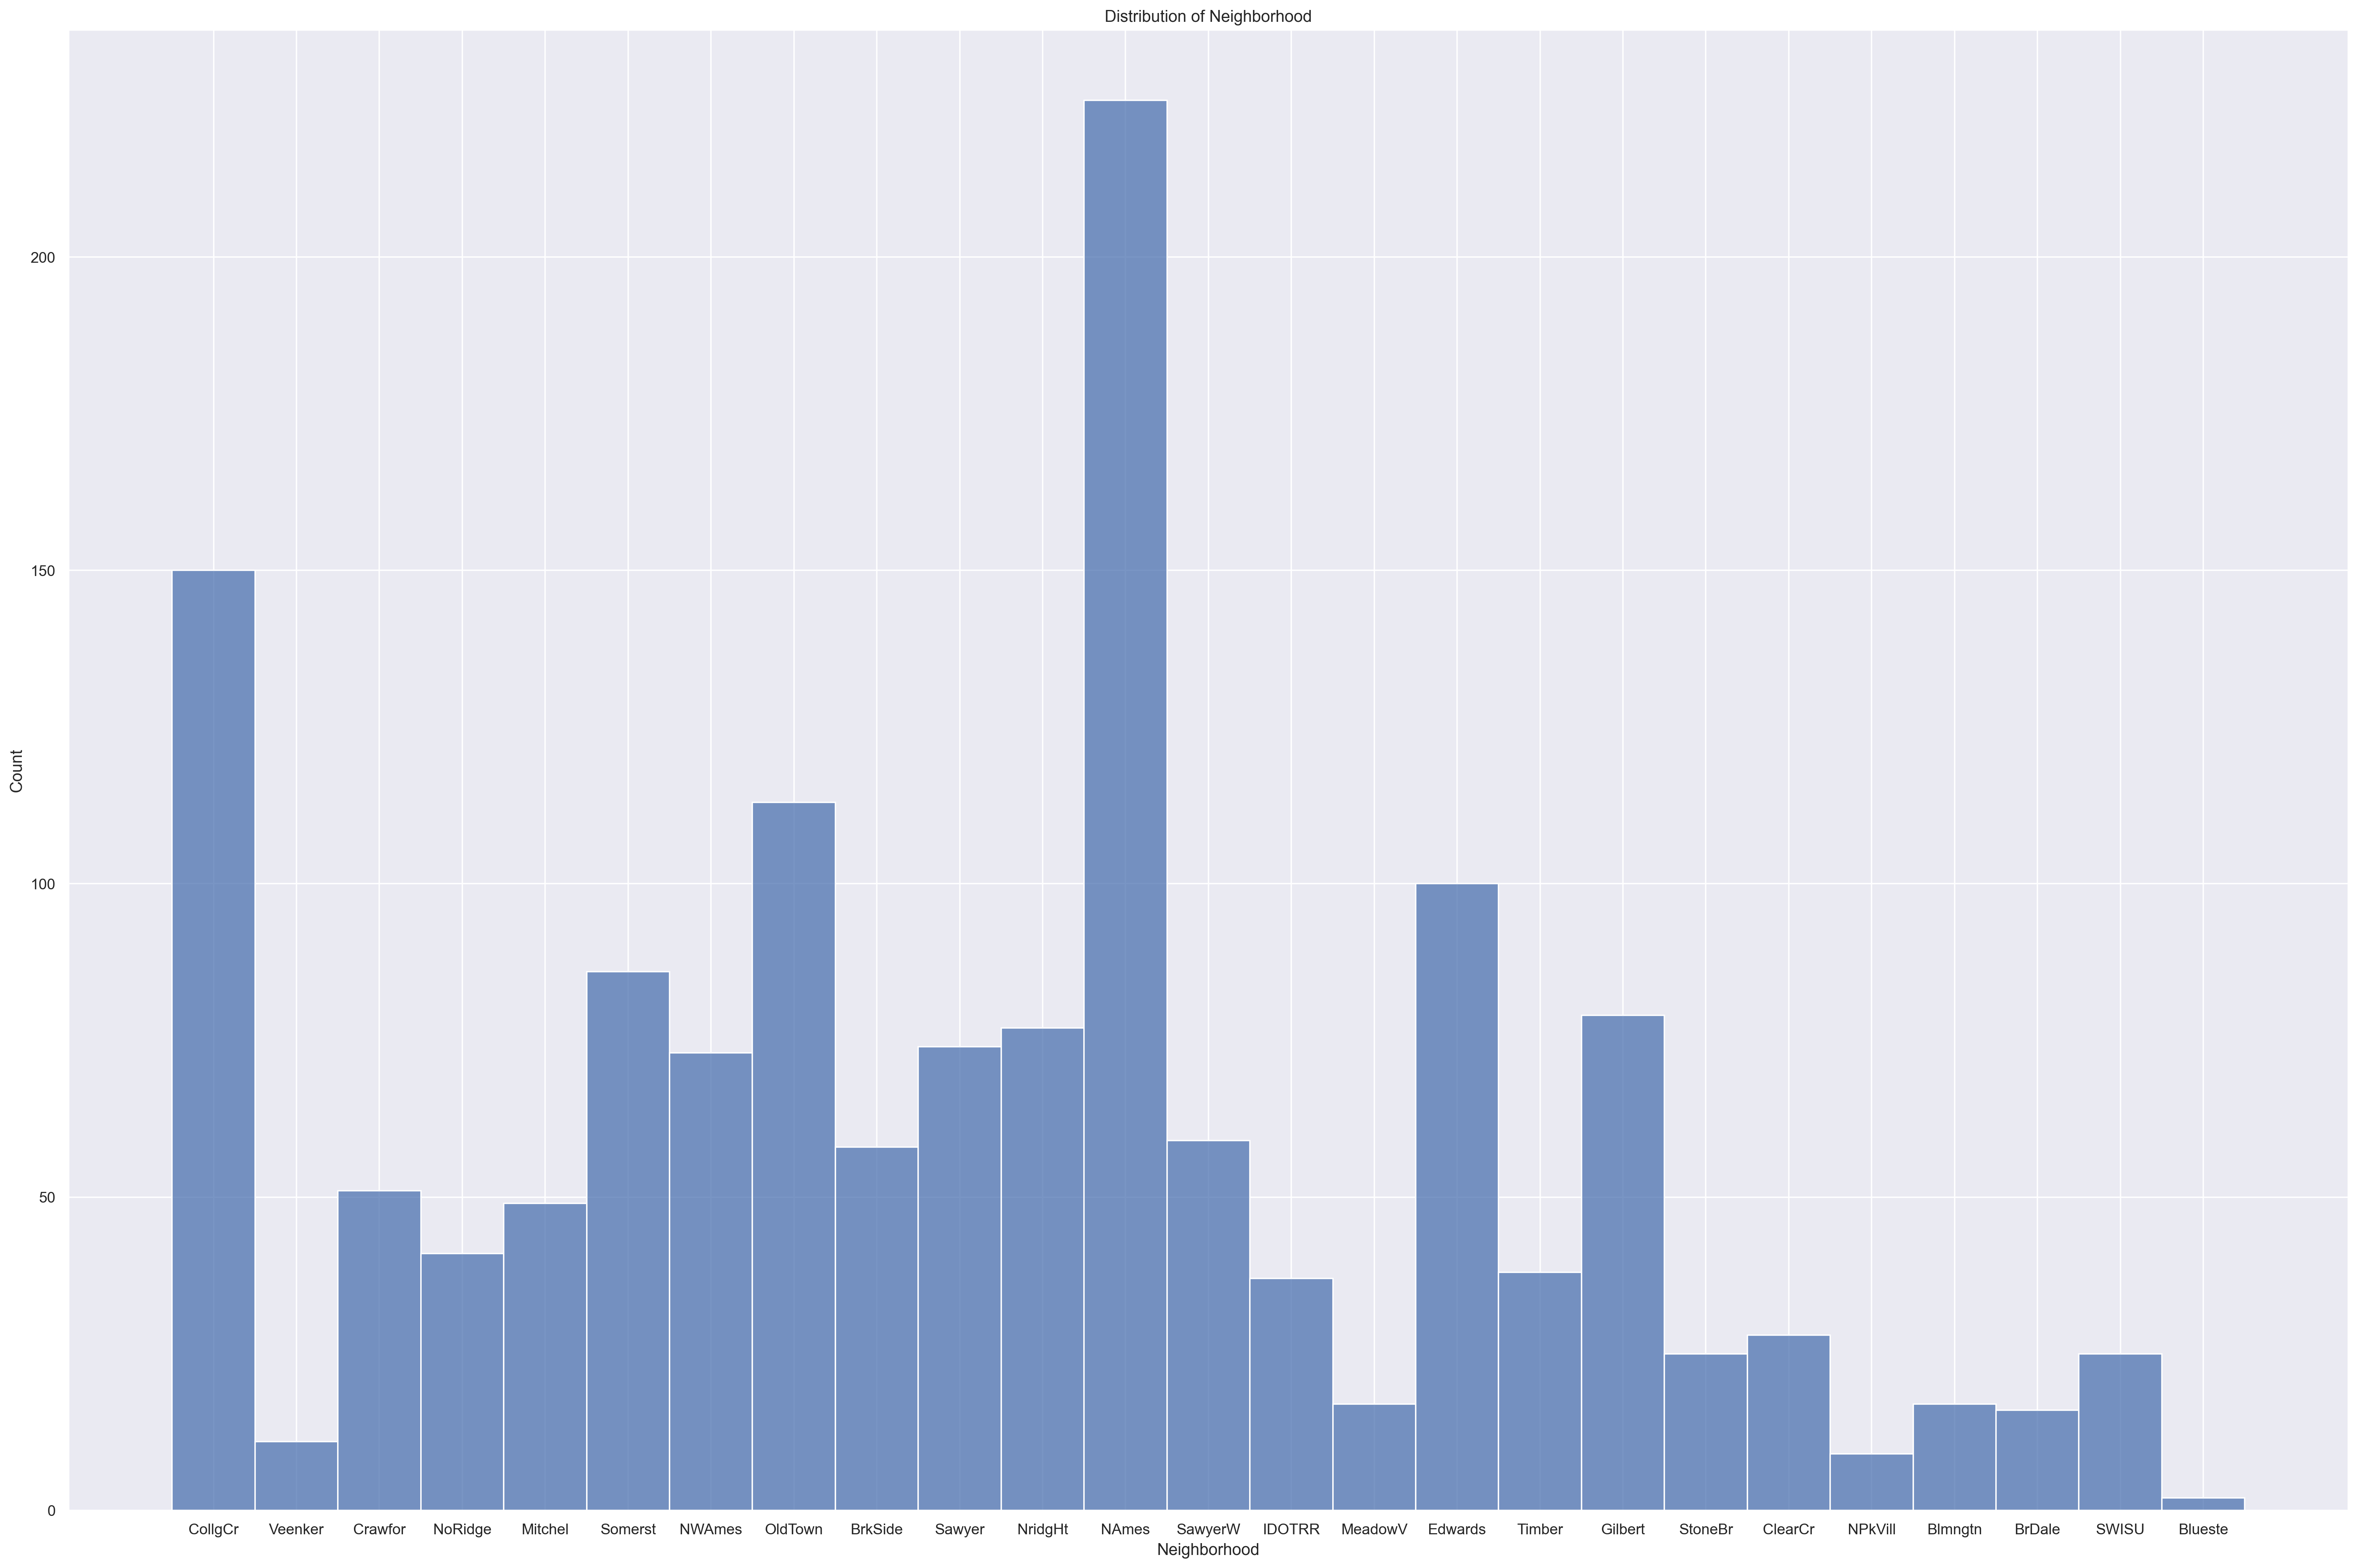

In [61]:
from matplotlib.pyplot import figure
figure(num=None, figsize=(30,20), dpi=256, facecolor='w', edgecolor='r')
sns.histplot(train['Neighborhood'], bins = 20)
plt.title("Distribution of Neighborhood")

In [62]:
train['Neighborhood'].describe()

count      1460
unique       25
top       NAmes
freq        225
Name: Neighborhood, dtype: object

### Findings:
    * There is a total of 225 neighborhoods
    * The largest neighborhood is NAmes with the frequency of 225
    * The second largest is CollgCr and the third is Old Town
    * The smallest neighborhood is Blueste
    * The distribution shape is not normal

In [63]:
train['Neighborhood'].unique()

array(['CollgCr', 'Veenker', 'Crawfor', 'NoRidge', 'Mitchel', 'Somerst',
       'NWAmes', 'OldTown', 'BrkSide', 'Sawyer', 'NridgHt', 'NAmes',
       'SawyerW', 'IDOTRR', 'MeadowV', 'Edwards', 'Timber', 'Gilbert',
       'StoneBr', 'ClearCr', 'NPkVill', 'Blmngtn', 'BrDale', 'SWISU',
       'Blueste'], dtype=object)

In [64]:
train.groupby("Neighborhood").mean()['SalePrice'].sort_values()

Neighborhood
MeadowV     98576.470588
IDOTRR     100123.783784
BrDale     104493.750000
BrkSide    124834.051724
Edwards    128219.700000
OldTown    128225.300885
Sawyer     136793.135135
Blueste    137500.000000
SWISU      142591.360000
NPkVill    142694.444444
NAmes      145847.080000
Mitchel    156270.122449
SawyerW    186555.796610
NWAmes     189050.068493
Gilbert    192854.506329
Blmngtn    194870.882353
CollgCr    197965.773333
Crawfor    210624.725490
ClearCr    212565.428571
Somerst    225379.837209
Veenker    238772.727273
Timber     242247.447368
StoneBr    310499.000000
NridgHt    316270.623377
NoRidge    335295.317073
Name: SalePrice, dtype: float64

<AxesSubplot:xlabel='Neighborhood', ylabel='SalePrice'>

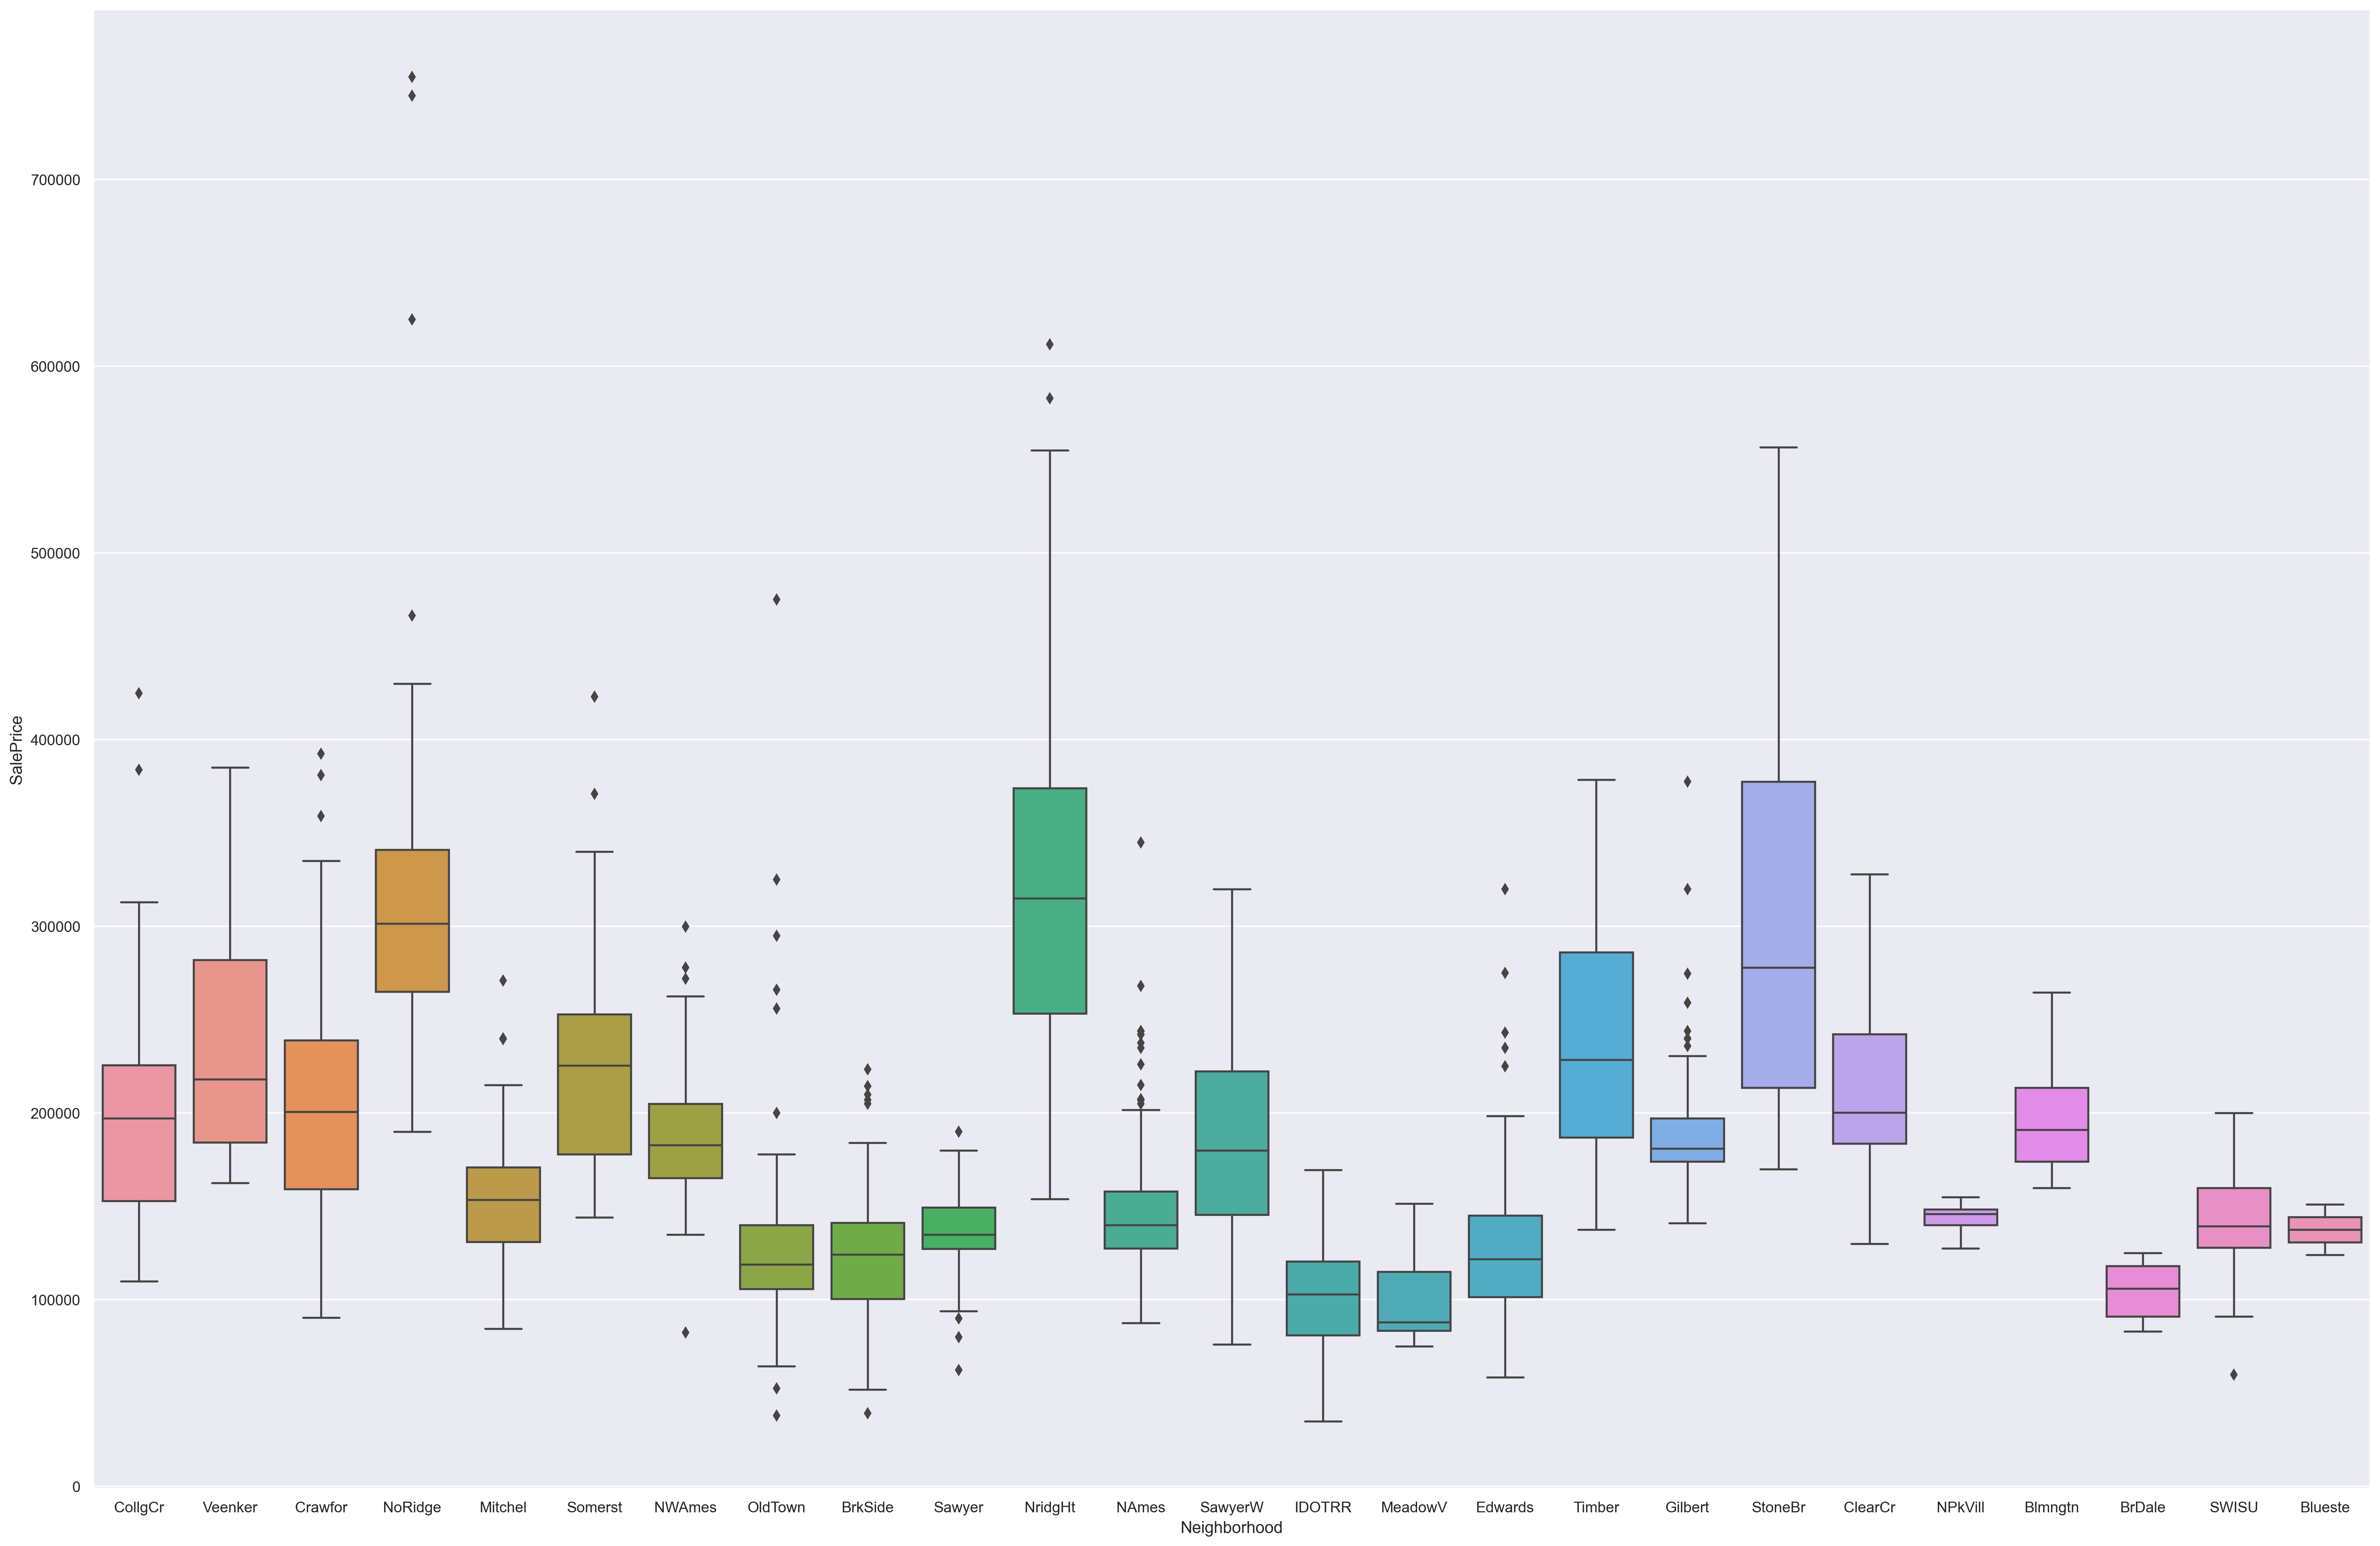

In [65]:
from matplotlib.pyplot import figure
figure(num=None, figsize=(30,20), dpi=256, facecolor='w', edgecolor='r')
sns.boxplot(x = 'Neighborhood', y = 'SalePrice', data = train)

### Findings:
    * There are outliers in various neighborhoods which are CollgCr, Crawfor, NoRidge, Mitchel, Somerst, NWAmes, OldTown, BrkSide, Sawyer, NridgHt, NAmes, Edwards, Gilbert, SWISU
    * The highest sale price of house is located at the NoRidge neighborhood
    * In general, the neighborhood NrdigHt and StoneBr has a relatively high disperese in saleprice data
    * From the median value, it is observed that the neighborhood with the highest average saleprice is located at NridgHt
    * From the median value, it is observed that the neighborhood with the lowest average saleprice is located at MeadowV

In [66]:
Cat = train.loc[:,['MSZoning','SaleType','Neighborhood','LotShape']]
Num = train.loc[:,['YearBuilt','SalePrice','FullBath','Fireplaces']]

### Numerical Variable Summary Plot

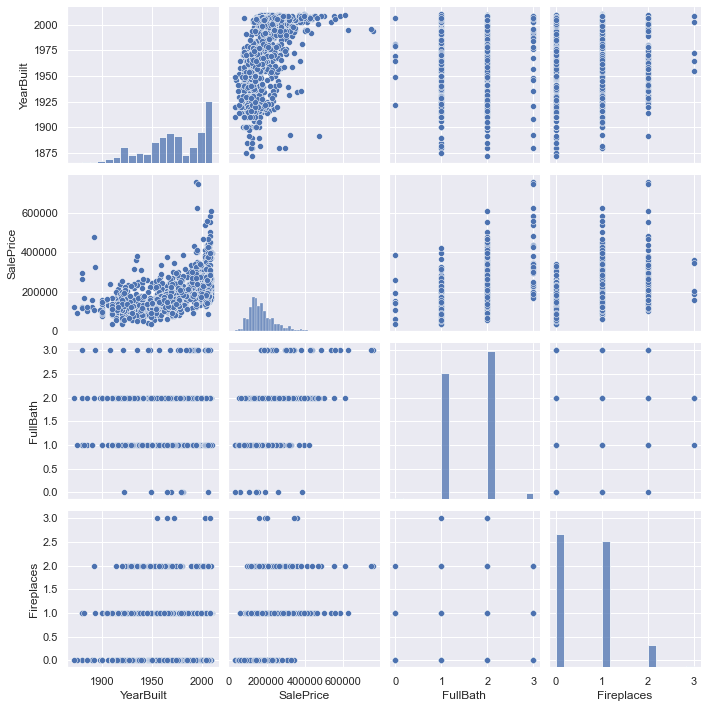

In [67]:
sns.pairplot(Num, palette= 'Set2')

## Categorical Variable Summary 

In [75]:
Cat.describe()

,MSZoning,SaleType,Neighborhood,LotShape
count,1460,1460,1460,1460
unique,5,9,25,4
top,RL,WD,NAmes,Reg
freq,1151,1267,225,925
